In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
%matplotlib inline
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [2]:
 
# Models from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor
 
# Model Evaluations
 
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
 
#%%

In [3]:
dsUSDEUR = pd.read_csv('One_Handled.csv')
data2 = pd.read_csv('')
 

In [4]:
 
frames = [data1, data2]
dsUSDEUR = pd.concat(frames)
 

In [4]:
#%%
 
dsUSDEUR.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    200 non-null    object 
 1   Open    200 non-null    float64
 2   High    200 non-null    float64
 3   Low     200 non-null    float64
 4   Close   200 non-null    float64
 5   Volume  200 non-null    float64
 6   Day     200 non-null    int64  
 7   Month   200 non-null    int64  
 8   Year    200 non-null    int64  
 9   Hour    200 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
 
dsUSDEUR.head()
 
# tu bang thi ta co the nhan xet rang du lieu duoc lay sau moi 15 phut
 
#%%

,Time,Open,High,Low,Close,Volume,Day,Month,Year,Hour
0,01.01.2013 01:00:00.000,1.31975,1.32991,1.31570,1.31833,174395.5469,1,1,2013,1
1,02.01.2013 01:00:00.000,1.31836,1.31887,1.30222,1.30243,173935.4375,2,1,2013,1
2,03.01.2013 01:00:00.000,1.30240,1.30892,1.29971,1.30678,163991.1094,3,1,2013,1
3,04.01.2013 01:00:00.000,1.30678,1.30678,1.30678,1.30678,0.0000,4,1,2013,1
4,05.01.2013 01:00:00.000,1.30745,1.30792,1.30655,1.30676,4326.2202,5,1,2013,1


In [6]:
 
# Missing values?
dsUSDEUR.isna().sum()
 

Time      0
Open      0
High      0
Low       0
Close     0
Volume    0
Day       0
Month     0
Year      0
Hour      0
dtype: int64

In [7]:
# => du lieu cleaned
 
test = dsUSDEUR.head(50)
  
test.info()
 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    50 non-null     object 
 1   Open    50 non-null     float64
 2   High    50 non-null     float64
 3   Low     50 non-null     float64
 4   Close   50 non-null     float64
 5   Volume  50 non-null     float64
 6   Day     50 non-null     int64  
 7   Month   50 non-null     int64  
 8   Year    50 non-null     int64  
 9   Hour    50 non-null     int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 4.0+ KB


<AxesSubplot:>

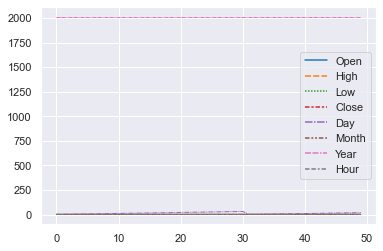

In [8]:
sns.set_theme(style="darkgrid")
testRate = test.drop(['Volume'], axis=1)
 
sns.lineplot(data=testRate, palette="tab10", linewidth=1)
 
 
 

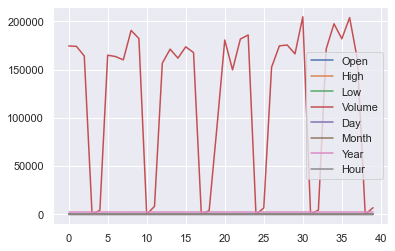

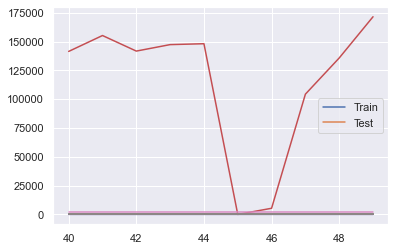

In [14]:
#%%
# testRate['Time'] = testRate['Time'].astype(int)
size = int(len(testRate)*0.80)
train_data = testRate[:size]
test_data = testRate[size:]

train_data.plot(legend=True)
test_data.plot(legend=True)
plt.legend(['Train', 'Test'])
plt.show()
 

In [29]:
sc = MinMaxScaler()
train_sc = sc.fit_transform(train_data)
test_sc = sc.transform(test_data)

ValueError: could not convert string to float: '01.01.2013 01:00:00.000'

In [37]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [40]:

from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model

In [39]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

IndexError: tuple index out of range

In [51]:
 
#
# LSTM
#
dim_entrada = (X_train.shape[1],1)
dim_salida = 1
na = 50
 
modelo = Sequential()
modelo.add(LSTM(units=na, input_shape=dim_entrada))
modelo.add(Dense(units=dim_salida))
modelo.compile(optimizer='rmsprop', loss='mse')
modelo.fit(X_train,Y_train,epochs=20,batch_size=32)

IndexError: tuple index out of range

In [52]:
testRate = test.drop(['Volume', "Open", "High", "Low"], axis=1)

In [53]:
testRate.head()

,Time,Close
0,03.06.2013 00:00:00.000,1.29904
1,03.06.2013 00:15:00.000,1.29964
2,03.06.2013 00:30:00.000,1.29977
3,03.06.2013 00:45:00.000,1.30043
4,03.06.2013 01:00:00.000,1.29978


In [10]:
for label, content in testRate.items():
    testRate['Temp'] = testRate['Time'].astype('string')

In [11]:
testRate['Dates'] = testRate['Temp'].str.split(' ').str[0]

In [12]:
testRate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    50 non-null     object 
 1   Open    50 non-null     float64
 2   High    50 non-null     float64
 3   Low     50 non-null     float64
 4   Close   50 non-null     float64
 5   Temp    50 non-null     string 
 6   Dates   50 non-null     object 
dtypes: float64(4), object(2), string(1)
memory usage: 3.1+ KB


In [75]:
testRate['Dates'] = testRate['Dates'].astype('string')
testRate['Dates']

0     03.06.2013
1     03.06.2013
2     03.06.2013
3     03.06.2013
4     03.06.2013
5     03.06.2013
6     03.06.2013
7     03.06.2013
8     03.06.2013
9     03.06.2013
10    03.06.2013
11    03.06.2013
12    03.06.2013
13    03.06.2013
14    03.06.2013
15    03.06.2013
16    03.06.2013
17    03.06.2013
18    03.06.2013
19    03.06.2013
20    03.06.2013
21    03.06.2013
22    03.06.2013
23    03.06.2013
24    03.06.2013
25    03.06.2013
26    03.06.2013
27    03.06.2013
28    03.06.2013
29    03.06.2013
30    03.06.2013
31    03.06.2013
32    03.06.2013
33    03.06.2013
34    03.06.2013
35    03.06.2013
36    03.06.2013
37    03.06.2013
38    03.06.2013
39    03.06.2013
40    03.06.2013
41    03.06.2013
42    03.06.2013
43    03.06.2013
44    03.06.2013
45    03.06.2013
46    03.06.2013
47    03.06.2013
48    03.06.2013
49    03.06.2013
Name: Dates, dtype: string

In [22]:
import datetime
for x in testRate['Dates']:
    x = datetime.datetime.strptime(x, '%Y-%m-%d')
    
testRate['Dates'] = x
testRate['Dates']
# testRate['Dates'] = datetime.datetime.strptime(testRate['Dates'], '%Y/%m-%d')

0    2013-02-19
1    2013-02-19
2    2013-02-19
3    2013-02-19
4    2013-02-19
5    2013-02-19
6    2013-02-19
7    2013-02-19
8    2013-02-19
9    2013-02-19
10   2013-02-19
11   2013-02-19
12   2013-02-19
13   2013-02-19
14   2013-02-19
15   2013-02-19
16   2013-02-19
17   2013-02-19
18   2013-02-19
19   2013-02-19
20   2013-02-19
21   2013-02-19
22   2013-02-19
23   2013-02-19
24   2013-02-19
25   2013-02-19
26   2013-02-19
27   2013-02-19
28   2013-02-19
29   2013-02-19
30   2013-02-19
31   2013-02-19
32   2013-02-19
33   2013-02-19
34   2013-02-19
35   2013-02-19
36   2013-02-19
37   2013-02-19
38   2013-02-19
39   2013-02-19
40   2013-02-19
41   2013-02-19
42   2013-02-19
43   2013-02-19
44   2013-02-19
45   2013-02-19
46   2013-02-19
47   2013-02-19
48   2013-02-19
49   2013-02-19
Name: Dates, dtype: datetime64[ns]

In [14]:
testRate['Dates'].str.split('.')

0     [03, 06, 2013]
1     [03, 06, 2013]
2     [03, 06, 2013]
3     [03, 06, 2013]
4     [03, 06, 2013]
5     [03, 06, 2013]
6     [03, 06, 2013]
7     [03, 06, 2013]
8     [03, 06, 2013]
9     [03, 06, 2013]
10    [03, 06, 2013]
11    [03, 06, 2013]
12    [03, 06, 2013]
13    [03, 06, 2013]
14    [03, 06, 2013]
15    [03, 06, 2013]
16    [03, 06, 2013]
17    [03, 06, 2013]
18    [03, 06, 2013]
19    [03, 06, 2013]
20    [03, 06, 2013]
21    [03, 06, 2013]
22    [03, 06, 2013]
23    [03, 06, 2013]
24    [03, 06, 2013]
25    [03, 06, 2013]
26    [03, 06, 2013]
27    [03, 06, 2013]
28    [03, 06, 2013]
29    [03, 06, 2013]
30    [03, 06, 2013]
31    [03, 06, 2013]
32    [03, 06, 2013]
33    [03, 06, 2013]
34    [03, 06, 2013]
35    [03, 06, 2013]
36    [03, 06, 2013]
37    [03, 06, 2013]
38    [03, 06, 2013]
39    [03, 06, 2013]
40    [03, 06, 2013]
41    [03, 06, 2013]
42    [03, 06, 2013]
43    [03, 06, 2013]
44    [03, 06, 2013]
45    [03, 06, 2013]
46    [03, 06, 2013]
47    [03, 06

In [15]:
testRate['Day'] = testRate['Dates'].str.split('.').str[0]
testRate['Month'] = testRate['Dates'].str.split('.').str[1]
testRate['Year'] = testRate['Dates'].str.split('.').str[2]

In [84]:
testRate.head()

,Time,Close,Temp,Dates,Day,Month,Year
0,03.06.2013 00:00:00.000,1.29904,03.06.2013 00:00:00.000,03.06.2013,03,06,2013
1,03.06.2013 00:15:00.000,1.29964,03.06.2013 00:15:00.000,03.06.2013,03,06,2013
2,03.06.2013 00:30:00.000,1.29977,03.06.2013 00:30:00.000,03.06.2013,03,06,2013
3,03.06.2013 00:45:00.000,1.30043,03.06.2013 00:45:00.000,03.06.2013,03,06,2013
4,03.06.2013 01:00:00.000,1.29978,03.06.2013 01:00:00.000,03.06.2013,03,06,2013


In [11]:
for label, content in testRate.items():
    testRate['Dates'] = testRate['Year'].astype('string') + '-' + testRate['Month'].astype('string') + '-' + testRate['Day'].astype('string')   

In [19]:
testRate['Dates']

0      2013-1-1
1      2013-1-2
2      2013-1-3
3      2013-1-4
4      2013-1-5
5      2013-1-6
6      2013-1-7
7      2013-1-8
8      2013-1-9
9     2013-1-10
10    2013-1-11
11    2013-1-12
12    2013-1-13
13    2013-1-14
14    2013-1-15
15    2013-1-16
16    2013-1-17
17    2013-1-18
18    2013-1-19
19    2013-1-20
20    2013-1-21
21    2013-1-22
22    2013-1-23
23    2013-1-24
24    2013-1-25
25    2013-1-26
26    2013-1-27
27    2013-1-28
28    2013-1-29
29    2013-1-30
30    2013-1-31
31     2013-2-1
32     2013-2-2
33     2013-2-3
34     2013-2-4
35     2013-2-5
36     2013-2-6
37     2013-2-7
38     2013-2-8
39     2013-2-9
40    2013-2-10
41    2013-2-11
42    2013-2-12
43    2013-2-13
44    2013-2-14
45    2013-2-15
46    2013-2-16
47    2013-2-17
48    2013-2-18
49    2013-2-19
Name: Dates, dtype: string

In [20]:
testRate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    50 non-null     object        
 1   Open    50 non-null     float64       
 2   High    50 non-null     float64       
 3   Low     50 non-null     float64       
 4   Close   50 non-null     float64       
 5   Temp    50 non-null     string        
 6   Dates   50 non-null     string        
 7   Day     50 non-null     object        
 8   Month   50 non-null     object        
 9   Year    50 non-null     object        
 10  Dates1  50 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(4), string(2)
memory usage: 4.7+ KB


In [21]:
testRate = testRate.drop("Year", axis=1)
testRate = testRate.drop("Month", axis=1)
testRate = testRate.drop("Day", axis=1)
testRate = testRate.drop("Dates", axis=1)
testRate = testRate.drop("Temp", axis=1)

In [45]:
testRate.head()

,Open,High,Low,Close,Dates1
0,1.29944,1.29955,1.29870,1.29904,2018-01-01
1,1.29904,1.29964,1.29904,1.29964,2018-01-01
2,1.29964,1.30015,1.29960,1.29977,2018-01-01
3,1.29977,1.30065,1.29972,1.30043,2018-01-01
4,1.30043,1.30043,1.29911,1.29978,2018-01-01


In [23]:
testRate = testRate.drop("Time", axis=1)

In [43]:
testRate['Dates1'] = pd.Timestamp('2018-01-01')

In [44]:
train = testRate.loc[:testRate['Dates1']]
test = testRate.loc[testRate['Dates1']:]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

TypeError: '0    2018-01-01
1    2018-01-01
2    2018-01-01
3    2018-01-01
4    2018-01-01
5    2018-01-01
6    2018-01-01
7    2018-01-01
8    2018-01-01
9    2018-01-01
10   2018-01-01
11   2018-01-01
12   2018-01-01
13   2018-01-01
14   2018-01-01
15   2018-01-01
16   2018-01-01
17   2018-01-01
18   2018-01-01
19   2018-01-01
20   2018-01-01
21   2018-01-01
22   2018-01-01
23   2018-01-01
24   2018-01-01
25   2018-01-01
26   2018-01-01
27   2018-01-01
28   2018-01-01
29   2018-01-01
30   2018-01-01
31   2018-01-01
32   2018-01-01
33   2018-01-01
34   2018-01-01
35   2018-01-01
36   2018-01-01
37   2018-01-01
38   2018-01-01
39   2018-01-01
40   2018-01-01
41   2018-01-01
42   2018-01-01
43   2018-01-01
44   2018-01-01
45   2018-01-01
46   2018-01-01
47   2018-01-01
48   2018-01-01
49   2018-01-01
Name: Dates1, dtype: datetime64[ns]' is an invalid key

In [36]:
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

NameError: name 'train' is not defined

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
testRate['Dates'] = testRate['Dates'].values.astype('datetime64[D]')
testRate['Dates']

KeyError: 'Dates'

In [10]:
testRate.head()

,Time,Open,High,Low,Close,Day,Month,Year,Hour
0,01.01.2013 01:00:00.000,1.31975,1.32991,1.31570,1.31833,1,1,2013,1
1,02.01.2013 01:00:00.000,1.31836,1.31887,1.30222,1.30243,2,1,2013,1
2,03.01.2013 01:00:00.000,1.30240,1.30892,1.29971,1.30678,3,1,2013,1
3,04.01.2013 01:00:00.000,1.30678,1.30678,1.30678,1.30678,4,1,2013,1
4,05.01.2013 01:00:00.000,1.30745,1.30792,1.30655,1.30676,5,1,2013,1


In [27]:
testRate = test.drop(['Time','Day','Month','Year', 'Hour'], axis=1)

In [12]:
testRate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    50 non-null     object 
 1   Open    50 non-null     float64
 2   High    50 non-null     float64
 3   Low     50 non-null     float64
 4   Close   50 non-null     float64
 5   Day     50 non-null     int64  
 6   Month   50 non-null     int64  
 7   Year    50 non-null     int64  
 8   Hour    50 non-null     int64  
 9   Dates   50 non-null     string 
dtypes: float64(4), int64(4), object(1), string(1)
memory usage: 4.0+ KB


In [17]:
testRate["Time"] = pd.to_datetime(testRate['Dates'])


In [19]:
ind_exchange_data = testRate.set_index(["Time"], drop=True)

In [20]:
df1 = ind_exchange_data[["Close"]]

In [21]:
df2 = df1.rename(columns={'Close': 'Price'})

In [22]:

df2= df2.astype(float)

In [23]:

df2.head()

,Price
Time,
2013-01-01,1.31833
2013-01-02,1.30243
2013-01-03,1.30678
2013-01-04,1.30678
2013-01-05,1.30676


<AxesSubplot:xlabel='Time'>

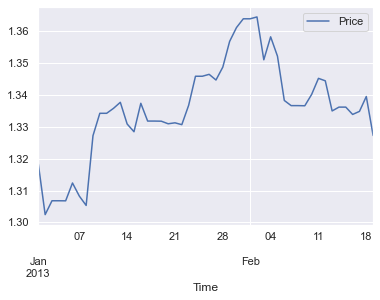

In [24]:
df2.plot()

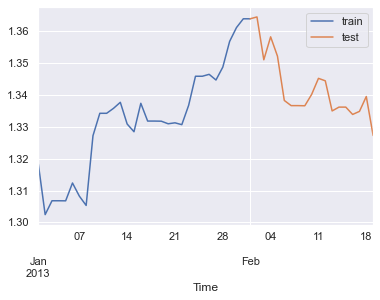

In [60]:
split_date = pd.Timestamp('2013-02-01')

train = df2.loc[:split_date]
test = df2.loc[split_date:]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [61]:
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [62]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [63]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model

In [64]:
K.clear_session()

In [71]:
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/50
31/31 [==============================] - 0s 527us/step - loss: 0.1258
Epoch 2/50
31/31 [==============================] - 0s 581us/step - loss: 0.0675
Epoch 3/50
31/31 [==============================] - 0s 612us/step - loss: 0.0383
Epoch 4/50
31/31 [==============================] - 0s 677us/step - loss: 0.0256
Epoch 5/50
31/31 [==============================] - 0s 742us/step - loss: 0.0212
Epoch 6/50
31/31 [==============================] - 0s 613us/step - loss: 0.0199
Epoch 7/50
31/31 [==============================] - 0s 677us/step - loss: 0.0194
Epoch 8/50
31/31 [==============================] - 0s 710us/step - loss: 0.0190
Epoch 9/50
31/31 [==============================] - 0s 677us/step - loss: 0.0185
Epoch 10/50
31/31 [==============================] - 0s 715us/step - loss: 0.0180
Epoch 11/50
31/31 [==============================] - 0s 548us/step - loss: 0.0174
Epoch 12/50
31/31 [==============================] - 0s 645us/step - loss: 0.0168
Epoch 13/50
31/31 [======

In [74]:
y_pred_test_ann = model.predict(X_test)
y_train_pred_ann = model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_ann)))
r2_train = r2_score(y_train, y_train_pred_ann)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_ann)))
r2_test = r2_score(y_test, y_pred_test_ann)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

The R2 score on the Train set is:	0.869
The Adjusted R2 score on the Train set is:	0.865

The R2 score on the Test set is:	0.439
The Adjusted R2 score on the Test set is:	0.404


In [76]:
model.save('ANN_NonShift.h5')

In [77]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [78]:
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(7, input_shape=(1, X_train.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

Epoch 1/200
31/31 [==============================] - 0s 871us/step - loss: 0.3667
Epoch 2/200
31/31 [==============================] - 0s 1ms/step - loss: 0.3031
Epoch 3/200
31/31 [==============================] - 0s 1ms/step - loss: 0.2527
Epoch 4/200
31/31 [==============================] - 0s 968us/step - loss: 0.2103
Epoch 5/200
31/31 [==============================] - 0s 1ms/step - loss: 0.1739
Epoch 6/200
31/31 [==============================] - 0s 967us/step - loss: 0.1426
Epoch 7/200
31/31 [==============================] - 0s 839us/step - loss: 0.1161
Epoch 8/200
31/31 [==============================] - 0s 710us/step - loss: 0.0942
Epoch 9/200
31/31 [==============================] - 0s 904us/step - loss: 0.0768
Epoch 10/200
31/31 [==============================] - 0s 1ms/step - loss: 0.0635
Epoch 11/200
31/31 [==============================] - 0s 2ms/step - loss: 0.0538
Epoch 12/200
31/31 [==============================] - 0s 1ms/step - loss: 0.0471
Epoch 13/200
31/31 [=====

31/31 [==============================] - 0s 871us/step - loss: 0.0099
Epoch 101/200
31/31 [==============================] - 0s 968us/step - loss: 0.0099
Epoch 102/200
31/31 [==============================] - 0s 935us/step - loss: 0.0099
Epoch 103/200
31/31 [==============================] - 0s 968us/step - loss: 0.0099
Epoch 104/200
31/31 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 105/200
31/31 [==============================] - 0s 903us/step - loss: 0.0098
Epoch 106/200
31/31 [==============================] - 0s 871us/step - loss: 0.0098
Epoch 107/200
31/31 [==============================] - 0s 935us/step - loss: 0.0098
Epoch 108/200
31/31 [==============================] - 0s 935us/step - loss: 0.0098
Epoch 109/200
31/31 [==============================] - 0s 871us/step - loss: 0.0098
Epoch 110/200
31/31 [==============================] - 0s 936us/step - loss: 0.0098
Epoch 111/200
31/31 [==============================] - 0s 937us/step - loss: 0.0098
Epoch 11

31/31 [==============================] - 0s 806us/step - loss: 0.0098
Epoch 198/200
31/31 [==============================] - 0s 935us/step - loss: 0.0098
Epoch 199/200
31/31 [==============================] - 0s 871us/step - loss: 0.0098
Epoch 200/200
31/31 [==============================] - 0s 870us/step - loss: 0.0098
The R2 score on the Train set is:	0.876
The Adjusted R2 score on the Train set is:	0.872

The R2 score on the Test set is:	0.306
The Adjusted R2 score on the Test set is:	0.262


In [79]:
model_lstm.save('LSTM_NonShift.h5')

In [80]:

model_ann = load_model('ANN_NonShift.h5')
model_lstm = load_model('LSTM_NonShift.h5')

In [81]:
score_ann= model_ann.evaluate(X_test, y_test, batch_size=1)
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

18/18 [==============================] - 0s 651us/step - loss: 0.0156


In [83]:
print('ANN: %f'%score_ann)
print('LSTM: %f'%score_lstm)


ANN: 0.012591
LSTM: 0.015589


In [84]:

y_pred_test_ANN = model_ann.predict(X_test)
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

In [86]:
col1 = pd.DataFrame(y_test, columns=['True'])
col2 = pd.DataFrame(y_pred_test_ANN, columns=['ANN_prediction'])
col3 = pd.DataFrame(y_pred_test_LSTM, columns=['LSTM_prediction'])
col4 = pd.DataFrame(history.history['loss'], columns=['Loss_ANN'])
col5 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2, col3, col4, col5], axis=1)
results.to_excel('PredictionResults_ANN-LSTM_NonShift.xlsx')

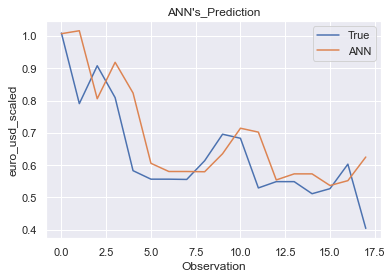

In [87]:

plt.plot(y_test, label='True')
plt.plot(y_pred_test_ANN, label='ANN')
plt.title("ANN's_Prediction")
plt.xlabel('Observation')
plt.ylabel('euro_usd_scaled')
plt.legend()
plt.show()

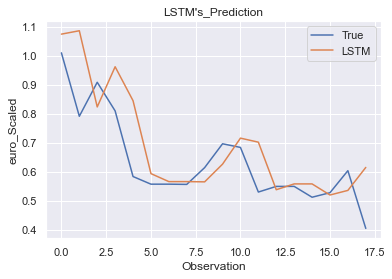

In [88]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('euro_Scaled')
plt.legend()
plt.show()